# Analyzing Spells Bound to D or F

First we have to import some modules and define some functions

In [3]:
from __future__ import division
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
% matplotlib inline

In [4]:
spells = {1: u'Cleanse',
 2: u'Clairvoyance',
 3: u'Exhaust',
 4: u'Flash',
 6: u'Ghost',
 7: u'Heal',
 11: u'Smite',
 12: u'Teleport',
 13: u'Clarity',
 14: u'Ignite',
 17: u'Garrison',
 21: u'Barrier',
 30: u'To the King!',
 31: u'Poro Toss',
 32: u'Mark'}

In [5]:
def getData(filename):
    features = []
    x = []
    y = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[:-2])
            y.append(row[-2:])
        features = x[0]
        x = x[1:]
        y = y[1:]
    return np.array(features), np.array(x), np.array(y)

In [6]:
def countSpells(features, x, y, spells):
    """
    """
    dkey = {}
    fkey = {}
    if int(y[0]) == 1:
        win = {"t100": True, "t200": False}
    else:
        win = {"t100": False, "t200": True}
    for i, feature in enumerate(features):
        if "spell1" in feature and x[i] == "1":
            f = feature.split(":spell1")
            team = f[0].split(":")[0]
            spell = spells[int(f[1])]
            if spell in dkey:
                dkey[spell][0] += 1
                if win[team]:
                    dkey[spell][1] += 1
            else:
                if win[team]:
                    dkey[spell] = [1, 1]
                else:
                    dkey[spell] = [1, 0]
        elif "spell2" in feature and x[i] == "1":
            f = feature.split(":spell2")
            team = f[0].split(":")[0]
            spell = spells[int(f[1])]
            if spell in fkey:
                fkey[spell][0] += 1
                if win[team]:
                    fkey[spell][1] += 1
            else:
                if win[team]:
                    fkey[spell] = [1, 1]
                else:
                    fkey[spell] = [1, 0]
    return dkey, fkey

In [7]:
def getSpellCount(features, x, y, spells):
    dkey = {}
    fkey = {}
    for i, row in enumerate(x):
        dup, fup = countSpells(features, row, y[i], spells)
        for key in dup:
            if key not in dkey:
                dkey[key] = dup[key]
            else:
                dkey[key][0] += dup[key][0]
                dkey[key][1] += dup[key][1]
        for key in fup:
            if key not in fkey:
                fkey[key] = fup[key]
            else:
                fkey[key][0] += fup[key][0]
                fkey[key][1] += fup[key][1]
    return dkey, fkey

In [8]:
def getTotals(dkey, fkey):
    dtotals = []
    dwins = []
    for key in dkey.keys():
        dtotals.append(dkey[key][0])
        dwins.append(dkey[key][1])
    ftotals = []
    fwins = []
    for key in dkey.keys():
        ftotals.append(fkey[key][0])
        fwins.append(fkey[key][1])
    return dtotals, dwins, ftotals, fwins

In [9]:
def plotData(dtotals, dwins, ftotals, fwins):
    numspells = np.arange(len(dkey))
    width = .4

    fig, ax = plt.subplots(figsize=(11, 7))
    rects1 = ax.bar(numspells, dtotals, width, color="#1a1aff")

    rects2 = ax.bar(numspells, dwins, width, color="#0066ff")

    rects3 = ax.bar(numspells + width, ftotals, width, color="#9966ff")

    rects4 = ax.bar(numspells + width, fwins, width, color="#9999ff")

    ax.set_ylabel("Games")
    ax.set_title("Spells on D vs F")
    ax.set_xticks(numspells + width)
    ax.set_xticklabels([x for x in dkey])

    a = ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ("Spell on D", "Wins on D", "Spell on F", "Win on F"))

In [10]:
def printStats(dkey, fkey):
    for s in dkey:
        print("{}{} -> D: {}%, F: {}%".format(s.replace("Summoner", ""), " "*(10 - len(s.replace("Summoner", ""))), round(dkey[s][1]/dkey[s][0]*100, 1), round(fkey[s][1]/fkey[s][0]*100, 1)))

# Bronze

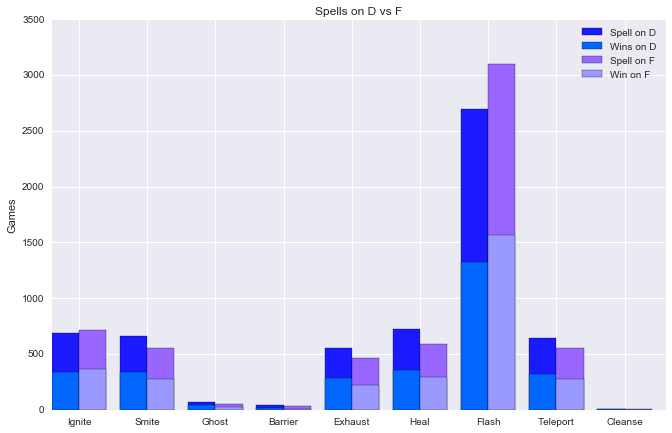

In [11]:
bfeatures, bx, by = getData("bronze.csv")
dkey, fkey = getSpellCount(bfeatures, bx, by, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [12]:
printStats(dkey, fkey)

Ignite     -> D: 49.5%, F: 51.1%
Smite      -> D: 51.2%, F: 49.5%
Ghost      -> D: 69.7%, F: 51.0%
Barrier    -> D: 42.6%, F: 30.6%
Exhaust    -> D: 52.3%, F: 48.2%
Heal       -> D: 49.9%, F: 50.0%
Flash      -> D: 49.2%, F: 50.4%
Teleport   -> D: 49.6%, F: 50.1%
Cleanse    -> D: 45.5%, F: 18.2%


# Silver

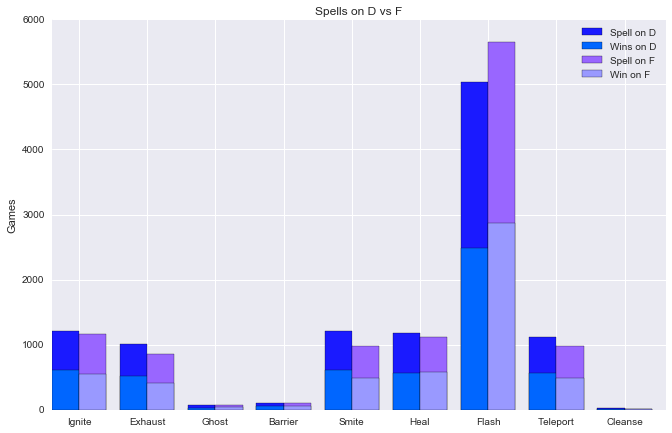

In [13]:
sfeatures, sx, sy = getData("silver.csv")
dkey, fkey = getSpellCount(sfeatures, sx, sy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [14]:
printStats(dkey, fkey)

Ignite     -> D: 50.9%, F: 47.5%
Exhaust    -> D: 52.0%, F: 48.7%
Ghost      -> D: 47.3%, F: 48.0%
Barrier    -> D: 50.5%, F: 47.3%
Smite      -> D: 51.1%, F: 48.9%
Heal       -> D: 48.2%, F: 52.1%
Flash      -> D: 49.5%, F: 50.6%
Teleport   -> D: 50.5%, F: 50.0%
Cleanse    -> D: 38.7%, F: 31.6%


# Gold

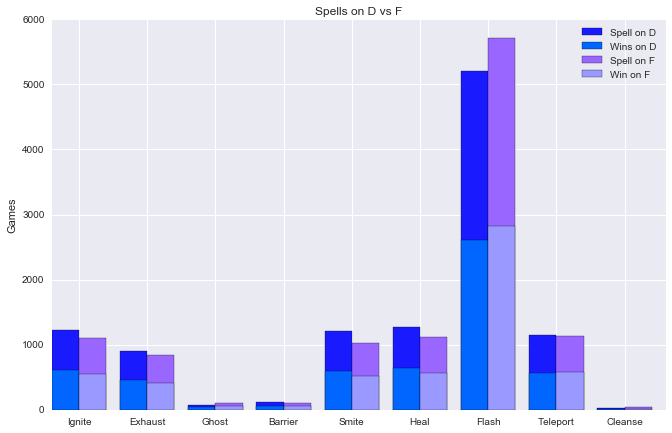

In [15]:
gfeatures, gx, gy = getData("gold.csv")
dkey, fkey = getSpellCount(gfeatures, gx, gy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [16]:
printStats(dkey, fkey)

Ignite     -> D: 50.5%, F: 49.5%
Exhaust    -> D: 50.9%, F: 49.8%
Ghost      -> D: 52.9%, F: 55.2%
Barrier    -> D: 47.8%, F: 50.9%
Smite      -> D: 49.5%, F: 50.5%
Heal       -> D: 49.7%, F: 51.0%
Flash      -> D: 50.1%, F: 49.5%
Teleport   -> D: 49.4%, F: 51.1%
Cleanse    -> D: 35.7%, F: 50.0%


# Platinum

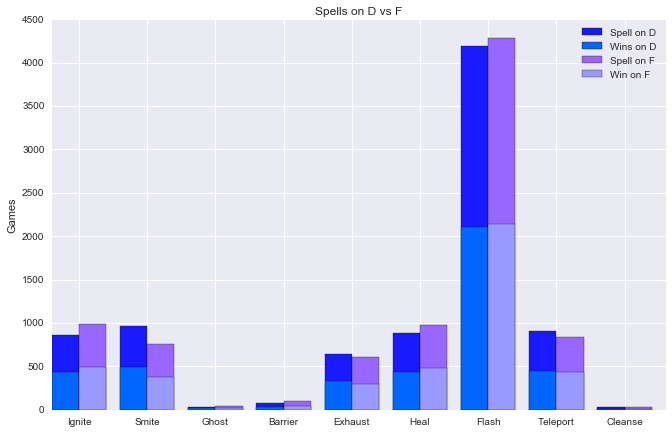

In [17]:
pfeatures, px, py = getData("platinum.csv")
dkey, fkey = getSpellCount(pfeatures, px, py, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [18]:
printStats(dkey, fkey)

Ignite     -> D: 50.4%, F: 50.3%
Smite      -> D: 50.6%, F: 49.5%
Ghost      -> D: 55.9%, F: 52.4%
Barrier    -> D: 44.3%, F: 48.5%
Exhaust    -> D: 51.4%, F: 49.2%
Heal       -> D: 49.4%, F: 49.6%
Flash      -> D: 50.1%, F: 49.9%
Teleport   -> D: 48.7%, F: 52.2%
Cleanse    -> D: 38.2%, F: 35.5%


# Diamond

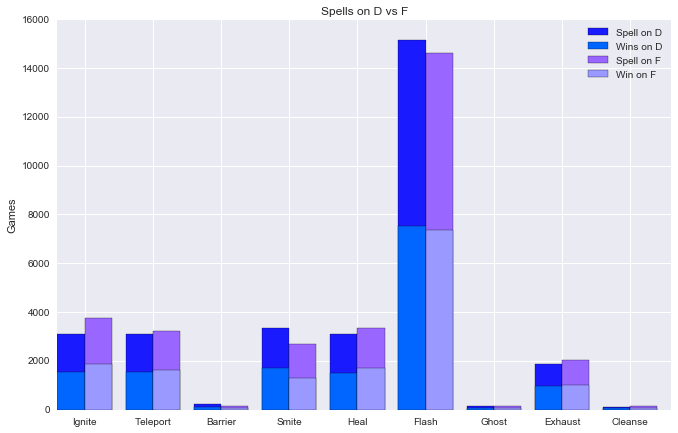

In [19]:
dfeatures, dx, dy = getData("diamond.csv")
dkey, fkey = getSpellCount(dfeatures, dx, dy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [20]:
printStats(dkey, fkey)

Ignite     -> D: 50.2%, F: 49.6%
Teleport   -> D: 49.4%, F: 50.2%
Barrier    -> D: 54.2%, F: 47.9%
Smite      -> D: 51.1%, F: 48.5%
Heal       -> D: 49.3%, F: 50.8%
Flash      -> D: 49.8%, F: 50.2%
Ghost      -> D: 43.6%, F: 52.4%
Exhaust    -> D: 51.5%, F: 49.6%
Cleanse    -> D: 48.4%, F: 45.1%


# Master

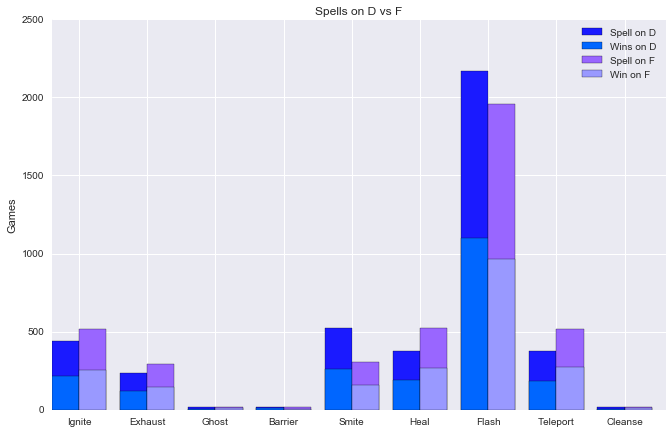

In [21]:
mfeatures, mx, my = getData("master.csv")
dkey, fkey = getSpellCount(mfeatures, mx, my, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [22]:
printStats(dkey, fkey)

Ignite     -> D: 48.3%, F: 49.6%
Exhaust    -> D: 50.9%, F: 49.3%
Ghost      -> D: 53.3%, F: 57.1%
Barrier    -> D: 68.8%, F: 44.4%
Smite      -> D: 49.2%, F: 51.0%
Heal       -> D: 50.9%, F: 50.5%
Flash      -> D: 50.6%, F: 49.2%
Teleport   -> D: 48.0%, F: 52.2%
Cleanse    -> D: 38.1%, F: 57.1%


# Challenger

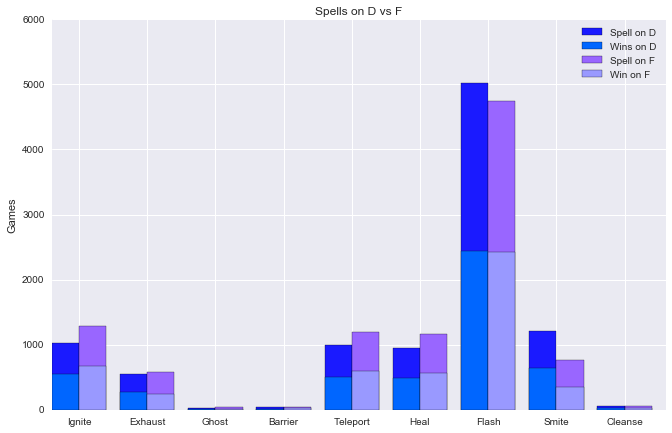

In [23]:
cfeatures, cx, cy = getData("challenger.csv")
dkey, fkey = getSpellCount(cfeatures, cx, cy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [24]:
printStats(dkey, fkey)

Ignite     -> D: 53.7%, F: 51.9%
Exhaust    -> D: 49.4%, F: 43.5%
Ghost      -> D: 50.0%, F: 50.0%
Barrier    -> D: 25.0%, F: 48.8%
Teleport   -> D: 50.9%, F: 49.9%
Heal       -> D: 50.7%, F: 48.8%
Flash      -> D: 48.6%, F: 51.3%
Smite      -> D: 52.3%, F: 46.1%
Cleanse    -> D: 48.5%, F: 49.1%


# Overall Totals

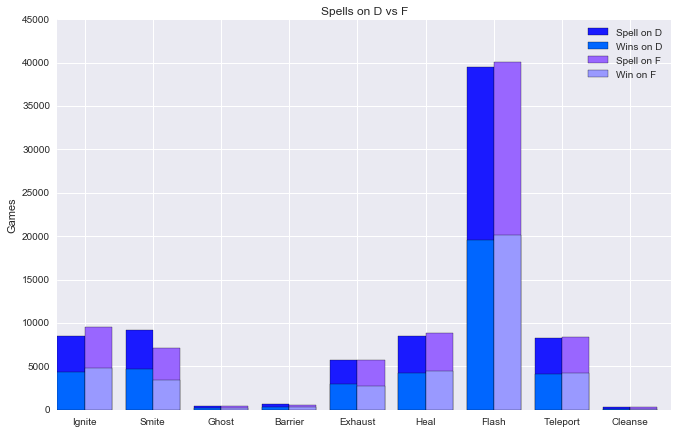

In [25]:
x = np.concatenate([bx, sx, gx, px, dx, mx, cx])
y = np.concatenate([by, sy, gy, py, dy, my, cy])
dkey, fkey = getSpellCount(bfeatures, x, y, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [26]:
printStats(dkey, fkey)

Ignite     -> D: 50.6%, F: 49.8%
Smite      -> D: 50.9%, F: 48.9%
Ghost      -> D: 51.5%, F: 52.2%
Barrier    -> D: 49.0%, F: 47.3%
Exhaust    -> D: 51.3%, F: 48.7%
Heal       -> D: 49.5%, F: 50.5%
Flash      -> D: 49.7%, F: 50.2%
Teleport   -> D: 49.6%, F: 50.6%
Cleanse    -> D: 44.5%, F: 44.5%
